# Symbolic computation for the BLASSO applied to GMMs with diagonal covariances

Romane Giard - 08/2025

Notebook associated with the paper *Gaussian Mixture Model with unknown diagonal covariances via continuous sparse regularization*, by Romane Giard, Yohann De Castro and Clément Marteau. 

___

**Framework**

In this notebook, we provide controls using [SymPy](https://docs.sympy.org/latest/index.html) for the normalized Gaussian kernel $$K_{norm}(x,x')=(2u^2+\tau^2)^{1/4} (2{u'}^2+\tau^2)^{1/4}\frac{e^{-\frac{(t-t')^2}{2(u^2+{u'}^2+\tau^2)}}}{\sqrt{u^2+{u'}^2+\tau^2}}\,,$$ where $\tau>0$, $x=(t,u)$ and $x'=(t',u')$ belong to $\mathbb{R}\times [u_{min},+\infty)$. The parameter $t$ (resp. $u$) represents the mean of a Gaussian (resp. the standard deviation).

We give bounds for the kernel and its derivatives on regions depending on the semi-distance 
$$d(x,x')^2 := \frac{(t-t')^2}{{u'}^2+u^2+\tau^2} + \ln\left(\frac{{u'}^2+u^2+\tau^2}{\sqrt{2u^2+\tau^2}\sqrt{2{u'}^2+\tau^2}}\right)\,.$$

We work in a Riemannian geometry framework, and we use the Fisher-Rao metric defined by $\mathfrak{g}_x=\nabla_1\nabla_2 K_{norm}(x,x)$.
One can show that
$$\mathfrak{g}_x=\begin{pmatrix}
      \frac{1}{2u^2+\tau^2} & 0 \\
        0 &  \frac{2u^2}{(2u^2+\tau^2)^2}
\end{pmatrix}\,.$$
We calculate the Riemannian derivatives of $K_{norm}$ and provide controls on them.

Obtaining these bounds is a crucial step to ensure the existence of a non-degenerate dual certificate for our optimization problem.

**All main sections can be run independently.** The following cell must be run first.

In [1]:
from sympy import *
init_printing()
from IPython.display import display, Math

# I. Fisher-Rao metric and Poincaré geodesics
**Content**

* We calculate the metric $\mathfrak{g}$ associated with $K_{norm}$.
* We provide the associated Christoffel symbols.
* We check the parametrizations of geodesics for the Poincaré half-plane model.

## I.1. Metric and Christoffel symbols

**Definition of the normalized Gaussian kernel**

Normalized kernel:


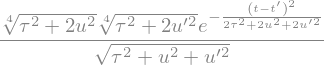

In [2]:
# Define symbolic variables for means (t_1, t_2), standard deviations (u_1, u_2), and the smoothing parameter tau.
t_1 , t_2, tau=symbols("t t' tau", real=True)
u_1, u_2=symbols("u u'", positive=True)

# Define the normalized Gaussian kernel, K_norm.
# This kernel is a function of t_1, u_1, t_2, u_2, and tau.
# Rational(1, 4) is 1/4
K_norm=(2*u_1**2+tau**2)**Rational(1, 4)*(2*u_2**2+tau**2)**Rational(1, 4)*1/sqrt(u_1**2+u_2**2+tau**2)*exp(-(t_1-t_2)**2/(2*(u_1**2+u_2**2+tau**2)))

# Display the symbolic expression for K_norm.
print("Normalized kernel:")
K_norm

**Metric**

We calculate $$\mathfrak{g}_x=\nabla_1\nabla_2 K_{norm}(x,x)=\begin{pmatrix}
      g_{tt} & g_{tu} \\
       g_{tu} &  g_{uu}
\end{pmatrix}\,.$$

Metric tensor :


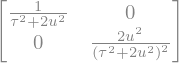

In [3]:
gtt=diff(K_norm,t_2,t_1).subs({t_2:t_1, u_2:u_1}) #Mixed derivative with respect to t_2 and t_1
gtu=diff(K_norm,t_2,u_1).subs({t_2:t_1, u_2:u_1}) #Mixed derivative with respect to t_2 and u_1
guu=diff(K_norm,u_2,u_1).subs({t_2:t_1, u_2:u_1}) #Mixed derivative with respect to u_2 and u_1

g=Matrix([[gtt,gtu],[gtu,guu]])
print("Metric tensor :")
g

**Christoffel symbols**

Christoffel symbols :


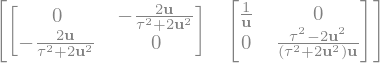

In [4]:
from sympy.diffgeom import Manifold, Patch, CoordSystem, metric_to_Christoffel_2nd, TensorProduct,twoform_to_matrix
TP = TensorProduct

# definition of our manifold
R2_tu = Manifold('m', 2) # 2-dimensional manifold
p = Patch('p', R2_tu)
cs = CoordSystem('cs', p, [t_1, u_1])
R2_tu.t, R2_tu.u = cs.coord_functions()
R2_tu.e_t, R2_tu.e_u = cs.base_vectors()
R2_tu.dt, R2_tu.du = cs.base_oneforms()

# metric to twoform
g_twoform=g[0,0].subs({t_1:R2_tu.t, u_1:R2_tu.u})*TP(R2_tu.dt, R2_tu.dt) + g[1,1].subs({t_1:R2_tu.t, u_1:R2_tu.u})*TP(R2_tu.du, R2_tu.du)

# christoffel symbols
christoffel_symbols=simplify(metric_to_Christoffel_2nd(g_twoform))
print("Christoffel symbols :")
christoffel_symbols

## I.2. Geodesics for the Poincaré half-plane model

The Poincaré half-plane is $\{x=(t,u) \in \mathbb{R}\times \mathbb{R}_+^*\}$, on which we consider the metric defined by $\mathfrak{h}_x = \begin{pmatrix}
    \frac{1}{u^2}& 0 \\
    0 & \frac{1}{u^2}
\end{pmatrix}$ for all $x=(t,u) \in\mathbb{R}\times \mathbb{R}_+^*$.

We give the parametrization by arc-length of the geodesics for this model, and we write $\tilde h=(\tilde h_t,\tilde h_u)$ for such geodesics.

**Metric**

Poincare metric :


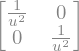

In [5]:
metric_h=Matrix([[1/(u_1**2),0],[0,1/(u_1**2)]])
print("Poincare metric :")
metric_h

**Christoffel symbols**

Christoffel symbols for Poincaré metric:


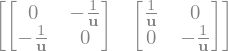

In [6]:
# definition of the Poincaré half-plane manifold
# This is a 2-dimensional manifold with coordinates t and u.
R2_tu = Manifold('m', 2)
p = Patch('p', R2_tu)
cs = CoordSystem('cs', p, [t_1, u_1])
R2_tu.t, R2_tu.u = cs.coord_functions()
R2_tu.e_t, R2_tu.e_u = cs.base_vectors()
R2_tu.dt, R2_tu.du = cs.base_oneforms()

# metric to twoform 
h_twoform=metric_h[0,0].subs({t_1:R2_tu.t, u_1:R2_tu.u})*TP(R2_tu.dt, R2_tu.dt) + metric_h[1,1].subs({t_1:R2_tu.t, u_1:R2_tu.u})*TP(R2_tu.du, R2_tu.du)

# christoffel symbols
christoffel_symbols_h=simplify(metric_to_Christoffel_2nd(h_twoform))
print("Christoffel symbols for Poincaré metric:")
christoffel_symbols_h

**Geodesic equations**

We first establish the 3 geodesic equations `eq_geod#`. The first one corresponds to the condition 
$$
(\dot{\tilde h}_t, \dot{ \tilde h}_u)^T \mathfrak{h}_{\tilde h} (\dot{\tilde h}_t, \dot{ \tilde h}_u)=1.
$$
We want $\tilde h$ to verify `eq_geod1`=`eq_geod2`=`eq_geod3`= 0.

Geodesic equation Poincaré 1/3:


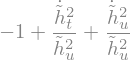

In [7]:
y=symbols('y',real=True)
htilde_u, htilde_t, htildedot_u, htildedot_t, htildeddot_u, htildeddot_t = symbols('htilde_u htilde_t htildedot_u htildedot_t htildeddot_u, htildeddot_t',real=True)
htilde_grad=Matrix([htildedot_t,htildedot_u])
eq_geod1=(htilde_grad.T*metric_h.subs({t_1: htilde_t, u_1:htilde_u})).dot(htilde_grad.T)-1
print("Geodesic equation Poincaré 1/3:")
eq_geod1

Geodesic equation Poincaré 2/3:


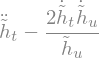

In [8]:
christoffel_symbols_h_t=christoffel_symbols_h[0].subs({R2_tu.t:htilde_t,R2_tu.u:htilde_u}).tomatrix()
eq_geod2=htildeddot_t+(htilde_grad.T*christoffel_symbols_h_t).dot(htilde_grad)
print("Geodesic equation Poincaré 2/3:")
eq_geod2

Geodesic equation Poincaré 3/3:


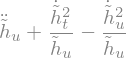

In [9]:
christoffel_symbols_h_u=christoffel_symbols_h[1].subs({R2_tu.t:htilde_t,R2_tu.u:htilde_u}).tomatrix()
eq_geod3=htildeddot_u+(htilde_grad.T*christoffel_symbols_h_u).dot(htilde_grad)
print("Geodesic equation Poincaré 3/3:")
eq_geod3

**Checking that our parametrizations are solutions** 

We check that the functions 

$$\tilde h_1: y\in [0,l] \mapsto \left(\frac{\tanh(C_2+y)}{C_1}+C_3, \frac{1}{\cosh(C_2+y) |C_1|}\right)\,,$$

$$\tilde h_2: y\in [0,l] \mapsto (C_3, |C_1| e^{y}) \quad \text{and} \quad \tilde h_3: y\in [0,l] \mapsto  (C_3, |C_1| e^{-y})$$ 

are parametrizations by arc-length of Poincaré geodesics, where $C_1 \in \mathbb{R}^*$, $C_2,C_3\in \mathbb{R}$, $l \in \mathbb{R}_+$.

<IPython.core.display.Math object>

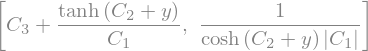

In [10]:
C_1,C_2,C_3=symbols('C_1 C_2 C_3',real=True)
sol_htilde_t_1=tanh(C_2+y)/C_1+C_3
sol_htilde_u_1=1/(cosh(C_2+y)*abs(C_1))
display(Math(r"\tilde h_1: y\mapsto \left(\frac{\tanh(C_2+y)}{C_1}+C_3, \frac{1}{\cosh(C_2+y) |C_1|}\right)"))
[sol_htilde_t_1 , sol_htilde_u_1]

In [11]:
sol_htilde_t_2=C_3
sol_htilde_u_2=abs(C_1)*exp(y)
display(Math(r"\tilde h_2: y\mapsto \left(C_3, |C_1| e^y\right)"))
[sol_htilde_t_2 , sol_htilde_u_2]

<IPython.core.display.Math object>

In [12]:
sol_htilde_t_3=C_3
sol_htilde_u_3=abs(C_1)*exp(-y)
display(Math(r"\tilde h_3: y\mapsto \left(C_3, |C_1| e^{-y}\right)"))
[sol_htilde_t_3 , sol_htilde_u_3]

<IPython.core.display.Math object>

In [13]:
# We provide SymPy with the necessary simplifications for hyperbolic functions, such as 1-tanh^2=1/(cosh^2)
def check_solution(sol_t,sol_u):
    substitutions={htilde_t:sol_t, htilde_u:sol_u, htildedot_t:sol_t.diff(y), htildedot_u:sol_u.diff(y), htildeddot_t:sol_t.diff(y,y), htildeddot_u:sol_u.diff(y,y)}
    check_eq_geod1=simplify(eq_geod1.subs(substitutions).replace(1-tanh(C_2+y)**2,1/(cosh(C_2+y)**2)))
    check_eq_geod2=simplify(eq_geod2.subs(substitutions).replace(tanh(C_2+y)**2-1,-1/(cosh(C_2+y)**2)).replace(tanh(C_2+y),sinh(C_2+y)/cosh(C_2+y)))
    check_eq_geod3=simplify(simplify(eq_geod3.subs(substitutions)).replace(tanh(C_2+y)**2-1,-1/(cosh(C_2+y)**2)))
    return [check_eq_geod1,check_eq_geod2,check_eq_geod3]==[0,0,0]

True means that the solution satisfies the three geodesic equations.

In [14]:
check_solution(sol_htilde_t_1 , sol_htilde_u_1)

True

In [15]:
check_solution(sol_htilde_t_2 , sol_htilde_u_2)

True

In [16]:
check_solution(sol_htilde_t_3 , sol_htilde_u_3)

True

# II. Growth of the semi-distance on the geodesic paths
Recall that our semi-distance is defined by $$d(x,x')^2 =\frac{(t-t')^2}{{u'}^2+u^2+\tau^2} + \ln\left(\frac{{u'}^2+u^2+\tau^2}{\sqrt{2u^2+\tau^2}\sqrt{2{u'}^2+\tau^2}}\right)\,.$$
Let $\tilde \gamma: [0,l] \rightarrow \mathbb{R}\times \mathbb{R}^+$ be a geodesic parametrized by arc-length between $x_0=(t_0,u_0)$ and $x=(t,u)$ for the Fisher-Rao metric $$\mathfrak{g}_x=\begin{pmatrix}
      \frac{1}{2u^2+\tau^2} & 0 \\
        0 &  \frac{2u^2}{(2u^2+\tau^2)^2}
\end{pmatrix} \,.$$
We provided the expression of $\tilde{\gamma}$, depending on constants $c_1\in\mathbb{R}^*$, $c_2, c_3 \in \mathbb{R}$: we have $\tilde{\gamma}(y)$ of the form $$(\tilde{\gamma}_t(y),\tilde{\gamma}_u(y))=\left( c_{3} + \frac{\sqrt{2} \tanh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}}{2 c_{1}}, \  \sqrt{- \frac{\tau^{2}}{2} + \frac{1 - \tanh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}}{2 c_{1}^{2}}}\right)$$ (this expression is denoted as `(sol_gamma_t_1,sol_gamma_u_1)` )
or of the form $$(\tilde{\gamma}_t(y),\tilde{\gamma}_u(y))=\left( c_{3} , \  \sqrt{- \frac{\tau^{2}}{2} +\frac{c_{1}^2}{2} e^{\pm \sqrt{8} y} }\right)$$ (denoted as `(sol_gamma_t_2,sol_gamma_u_2)` with the plus sign, `(sol_gamma_t_3,sol_gamma_u_3)` with the minus sign). 

**Content**
* We determine $c_1$ and $c_3$ such that $\tilde{\gamma}(0)=x_0$.  
* We calculate $h(y)=d(x_0,\tilde{\gamma}(y))^2$.
* We calculate $h'(y)$.

In [17]:
#Parameters (t_1, u_1) and (t_2, u_2) stand for the coordinates of the points
t_1 , t_2, tau=symbols("t t' tau", real=True)
u_1, u_2=symbols("u u'", positive=True)

## II.1. Semi circles

### Calculating $h(y)=d(x_0,\tilde{\gamma}(y))$ for $\tilde{\gamma}$ a geodesic with starting point $x_0$

**Geodesics with starting point $x_0$**

A solution of the geodesic equations for the Fisher-Rao metric is given by semi-circles:


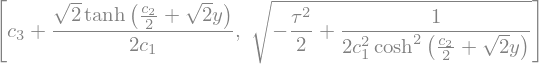

In [18]:
t_0=symbols('t_0')
u_0=symbols('u_0', positive=True)
c_1,c_2,c_3,y=symbols('c_1 c_2 c_3 y', real=True)
def sol_gamma_t_1(y):
    return tanh(c_2/2+sqrt(2)*y)/(sqrt(2)*c_1)+c_3
def sol_gamma_u_1(y):
    return sqrt(1/(2*cosh(c_2/2+sqrt(2)*y)**2*c_1**2)-tau**2/2)
print("A solution of the geodesic equations for the Fisher-Rao metric is given by semi-circles:")
[sol_gamma_t_1(y) , sol_gamma_u_1(y)]

The constant c_3 is determined by the initial condition t(0)=t_0:


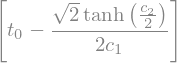

In [19]:
sol_c_3=solve(sol_gamma_t_1(0)-t_0, c_3)
print("The constant c_3 is determined by the initial condition t(0)=t_0:")
sol_c_3

The constant c_1 is determined by the initial condition u(0)=u_0:


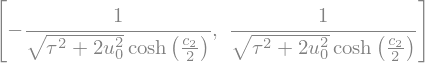

In [20]:
sol_c_1=solve(sol_gamma_u_1(0)-u_0, c_1)
print("The constant c_1 is determined by the initial condition u(0)=u_0:")
sol_c_1

The geodesic in the Fisher-Rao metric is given by:


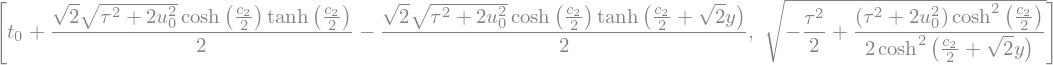

and


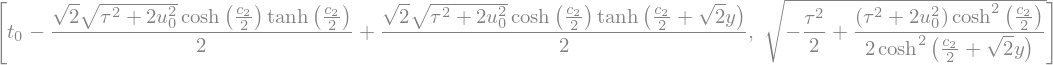

In [21]:
# c_1 can take 2 values, +- sol_c_1. It sign appears in the expression of gamma_tilde_t (with c_1 and c_3).
# The expression of sol_gamma_u only contains c_1**2, so the sign does not influence it.
# We will see that the sign of c_1 has actually no influence on d(x_0,gamma_tilde(y))**2.
gamma_tilde_t_1=sol_gamma_t_1(y).subs({c_3:sol_c_3[0]}).subs({c_1:sol_c_1[0]})
gamma_tilde_t_2=sol_gamma_t_1(y).subs({c_3:sol_c_3[0]}).subs({c_1:sol_c_1[1]})
gamma_tilde_u=sol_gamma_u_1(y).subs({c_1:sol_c_1[0]})
print("The geodesic in the Fisher-Rao metric is given by:")
sol1 = [gamma_tilde_t_1, gamma_tilde_u]
display(sol1)
print("and")
sol2 = [gamma_tilde_t_2, gamma_tilde_u]
display(sol2)


**Expression for $h(y)=d(x_0,\tilde{\gamma}(y))^2$**

`semi_dist_2` is $d(x,x')^2$.

h(y) is given by:


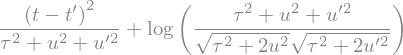

In [22]:
semi_dist_2=(t_1-t_2)**2/(u_1**2+u_2**2+tau**2)+ln((u_1**2+u_2**2+tau**2)/(sqrt(2*u_1**2+tau**2)*sqrt(2*u_2**2+tau**2)))
print("h(y) is given by:")
semi_dist_2

We compute the 2 possible expressions for $d(x_0,\tilde{\gamma}(y))^2$ depending on the sign of $c_1$. They are actually equal.

Semi-distance from (t_0, u_0) to (gamma_tilde_t_1(y), gamma_tilde_u(y)):


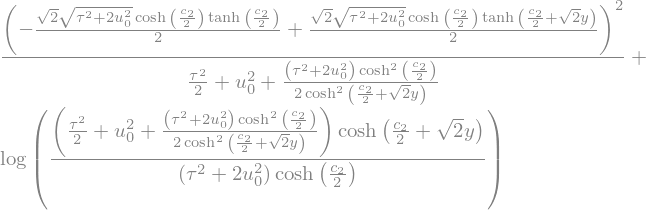

Semi-distance from (t_0, u_0) to (gamma_tilde_t_2(y), gamma_tilde_u(y)):


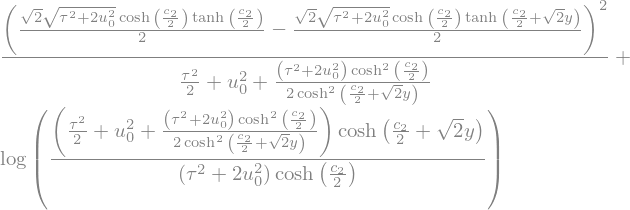

Test if h(y) is independent of the sign of c_1:
True


In [23]:
expr1 = (semi_dist_2.subs({t_1: t_0, u_1:u_0, t_2: gamma_tilde_t_1, u_2: gamma_tilde_u}))
expr2 = (semi_dist_2.subs({t_1: t_0, u_1:u_0, t_2: gamma_tilde_t_2, u_2: gamma_tilde_u}))
print("Semi-distance from (t_0, u_0) to (gamma_tilde_t_1(y), gamma_tilde_u(y)):")
display(expr1)
print("Semi-distance from (t_0, u_0) to (gamma_tilde_t_2(y), gamma_tilde_u(y)):")
display(expr2)

# We check that h(y) does not depend on the sign of c_1
print("Test if h(y) is independent of the sign of c_1:")
result = simplify(semi_dist_2.subs({t_1: t_0, u_1:u_0, t_2: gamma_tilde_t_1, u_2: gamma_tilde_u})-semi_dist_2.subs({t_1: t_0, u_1:u_0, t_2: gamma_tilde_t_2, u_2: gamma_tilde_u}))
print(result==0)

We use the expression of the semi-distance from $(t_0,u_0)$ to $\tilde \gamma_1(y)$ (denoted by $h(y)$).

We can show that 

$$
h(y)=\ln{\left(\frac{\cosh^{2}{\left(\frac{c_{2}}{2} \right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}}{2 \cosh{\left(\frac{c_{2}}{2} \right)} \cosh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}} \right)} + \frac{\sinh^{2}{\left(\sqrt{2} y \right)}}{\cosh^{2}{\left(\frac{c_{2}}{2} \right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}}\,.
$$

In fact, the expression in the above cell can be further simplified (by hand).

We have for the denominator

$$ 
2 \left(\frac{\cosh\left(c_{2} \right)}{2} + \frac{\cosh\left(c_{2} + 2 \sqrt{2} y \right)}{2} + 1\right)= 2\left(\cosh^2\left(\frac{c_{2}}{2} \right) + \cosh^2\left(\frac{c_{2}}{2} +\sqrt{2} y \right)  \right) \,,$$ 

along with, for the first term in the sum of the numerator,
$$
\begin{aligned}
2 \left(\tanh\left(\frac{c_{2}}{2} \right) - \tanh\left(\frac{c_{2}}{2} + \sqrt{2} y \right)\right)^{2} \cosh^2\left(\frac{c_{2}}{2} \right) \cosh^2\left(\frac{c_{2}}{2} + \sqrt{2} y \right) &= 2 \left(\sinh{\left(\frac{c_{2}}{2} \right)}\cosh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)} - \sinh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}\cosh{\left(\frac{c_{2}}{2} \right)}\right)^{2} \,, \\
&=2 \sinh^2\left( \sqrt{2} y \right) 
\end{aligned}
$$
and, for the denominator inside the log,
$$
\cosh(\sqrt{2}y)+ \cosh(c_2+\sqrt{2}y)=2\cosh\left(\frac{c_{2}}{2} \right) \cosh\left(\frac{c_{2}}{2} + \sqrt{2} y \right)\,.
$$

In [24]:
# Check the first identity
lhs = 2 * (cosh(c_2)/2 + cosh(c_2 + 2*sqrt(2)*y)/2 + 1)
rhs = 2 * (cosh(c_2/2)**2 + cosh(c_2/2 + sqrt(2)*y)**2)
print("Is the identity satisfied?", simplify(lhs - rhs) == 0)

Is the identity satisfied? True


In [25]:
# Check the second identity
lhs2 = (2 * (tanh(c_2/2) - tanh(c_2/2 + sqrt(2)*y))**2 * cosh(c_2/2)**2 * cosh(c_2/2 + sqrt(2)*y)**2)
lhs2= lhs2.replace(tanh(c_2/2),sinh(c_2/2)/cosh(c_2/2)).replace(tanh(c_2/2 + sqrt(2)*y),sinh(c_2/2 + sqrt(2)*y)/cosh(c_2/2 + sqrt(2)*y))
rhs2 = 2 * (sinh(c_2/2)*cosh(c_2/2 + sqrt(2)*y) - sinh(c_2/2 + sqrt(2)*y)*cosh(c_2/2))**2
print("Is the identity satisfied?", simplify(lhs2 - rhs2) == 0)

Is the identity satisfied? True


In [26]:
# Check the third identity
lhs3 = 2 * (sinh(c_2/2)*cosh(c_2/2 + sqrt(2)*y) - sinh(c_2/2 + sqrt(2)*y)*cosh(c_2/2))**2
rhs3 = 2 * sinh(sqrt(2)*y)**2
print("Is the identity satisfied?", simplify(lhs3 - rhs3) == 0)

Is the identity satisfied? True


In [27]:
# Check the fourth identity with sympy
lhs4 = cosh(sqrt(2)*y) + cosh(c_2 + sqrt(2)*y)
rhs4 = 2 * cosh(c_2/2) * cosh(c_2/2 + sqrt(2)*y)
print("Is the identity satisfied?", simplify(lhs4 - rhs4) == 0)

Is the identity satisfied? True


### Calculating $h'(y)$
We have $h(y) = A(y) + B(y)$ with
$$
A(y) = \frac{\sinh^{2}{\left(\sqrt{2} y \right)}}{\cosh^{2}{\left(\frac{c_{2}}{2}\right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y\right)}}\,.
$$

and
$$
B(y) = \log{\left(\frac{\cosh^{2}{\left(\frac{c_{2}}{2}\right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y\right)}}{2 \cosh{\left(\frac{c_{2}}{2}\right)} \cosh{\left(\frac{c_{2}}{2} + \sqrt{2} y\right)}}\right)}\,.
$$

We have used the above identities to obtain this simplification. The expression for $B$ is straightforward, while the expression for $A$ makes use of the first identities.

In [28]:
A = sinh(sqrt(2)*y)**2 / (cosh(c_2/2)**2 + cosh(c_2/2 + sqrt(2)*y)**2)
B = log((cosh(c_2/2)**2 + cosh(c_2/2 + sqrt(2)*y)**2) / (2 * cosh(c_2/2) * cosh(c_2/2 + sqrt(2)*y)))

**Derivative of $A$**

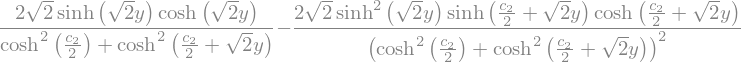

In [29]:
A.diff(y) #SymPy does not make a good job at simplifying this expression

In [30]:
simplify(A.diff(y)-sqrt(2)*sinh(sqrt(2)*y)*(cosh(c_2+sqrt(2)*y)+cosh(sqrt(2)*y)*(2+cosh(c_2)))/((cosh(c_2/2)**2+cosh(c_2/2+sqrt(2)*y)**2)**2))

We simplified this expression by hand. The 2 calculations that follow are intermediate steps.

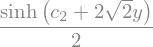

In [31]:
simplify(sinh(c_2/2+sqrt(2)*y)*cosh(c_2/2+sqrt(2)*y))

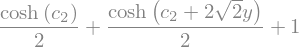

In [32]:
simplify(cosh(c_2/2)**2+cosh(c_2/2+sqrt(2)*y)**2)

We have

$$
\begin{aligned}
A'(y)&=\frac{2 \sqrt{2} \sinh{\left(\sqrt{2} y \right)} \cosh{\left(\sqrt{2} y \right)}}{\cosh^{2}{\left(\frac{c_{2}}{2} \right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}} - \frac{2 \sqrt{2} \sinh^{2}{\left(\sqrt{2} y \right)} \sinh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)} \cosh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}}{\left(\cosh^{2}{\left(\frac{c_{2}}{2} \right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}\right)^{2}} \,, \\
&= \frac{2 \sqrt{2} \sinh{\left(\sqrt{2} y \right)} \left( \left(\cosh^{2}{\left(\frac{c_{2}}{2} \right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}\right) \cosh{\left(\sqrt{2} y \right)} - \sinh{\left(\sqrt{2} y \right)} \sinh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)} \cosh{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)} \right)}{\left(\cosh^{2}{\left(\frac{c_{2}}{2} \right)} + \cosh^{2}{\left(\frac{c_{2}}{2} + \sqrt{2} y \right)}\right)^2} \,, \\
&= \frac{\sqrt{2} \sinh(\sqrt{2}y) \left( \cosh(c_2+\sqrt{2}y) +\cosh(\sqrt{2}y)(2+\cosh(c_2))\right)}{\left(\cosh^2\left(\frac{c_2}{2}\right)+\cosh^2\left(\frac{c_2}{2}+\sqrt{2}y\right)\right)^2} \,.
\end{aligned}
$$



**Derivative of $B$**

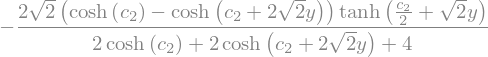

In [33]:
simplify(B.diff(y))

Using that $$2\cosh{\left(c_{2} \right)} + 2\cosh{\left(c_{2} + 2 \sqrt{2} y \right)} + 4=4\left(\cosh^2{\left(c_{2} \right)}+ \cosh^2{\left(c_{2} + 2 \sqrt{2} y \right)}\right)$$
and that $$\cosh{\left(c_{2} \right)} - \cosh{\left(c_{2} + 2 \sqrt{2} y \right)}=2\cosh^2{\left(c_{2} \right)}-2\cosh^2{\left(c_{2} + 2 \sqrt{2} y \right)} \,,$$
we deduce that 
$$B'(y)= \frac{\sqrt{2}\sinh\left(\frac{c_2}{2}+\sqrt{2}y\right)\left(\cosh^2\left(\frac{c_2}{2}+\sqrt{2}y\right) - \cosh^2\left(\frac{c_2}{2}\right)\right) }{\cosh\left(\frac{c_2}{2}+\sqrt{2}y\right) \left( \cosh^2\left(\frac{c_2}{2}\right)+\cosh^2\left(\frac{c_2}{2}+\sqrt{2}y\right)\right)} \,.$$

In [34]:
# Define the symbolic expression for the claimed derivative
numerator = sqrt(2) * sinh(c_2/2 + sqrt(2)*y) * (cosh(c_2/2 + sqrt(2)*y)**2 - cosh(c_2/2)**2)
denominator = cosh(c_2/2 + sqrt(2)*y) * (cosh(c_2/2)**2 + cosh(c_2/2 + sqrt(2)*y)**2)
claimed_derivative = numerator / denominator

# Compute the difference and simplify
print("Is the symbolic derivative equal to the claimed expression?", simplify(B.diff(y) - claimed_derivative) == 0)

Is the symbolic derivative equal to the claimed expression? True


## II.2. Half lines

For 
$$
(\tilde{\gamma}_t(y),\tilde{\gamma}_u(y))=\left( c_{3} , \  \sqrt{- \frac{\tau^{2}}{2} +\frac{c_{1}^2}{2} e^{\pm \sqrt{8} y} }\right)
$$ 
with starting point $x_0$, we have $c_3=t_0$ and $c_1^2=2u_0^2+\tau^2$ from which we deduce that $d(x_0, \tilde \gamma(y))^2=\ln(\cosh(\sqrt{2}y))$ (it is the same result with the plus or minus sign).

This function is non-decreasing on $\mathbb{R}_+$.

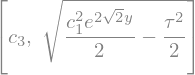

In [35]:
def sol_gamma_t_2(y):
    return c_3
def sol_gamma_u_2(y):
    return sqrt(c_1**2/2*exp(sqrt(8)*y)-tau**2/2)
[sol_gamma_t_2(y) , sol_gamma_u_2(y)]

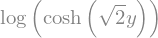

In [36]:
simplify(semi_dist_2.subs({t_1:c_3, u_1:sqrt(-tau**2/2+c_1**2/2), t_2: sol_gamma_t_2(y), u_2: sol_gamma_u_2(y)}))

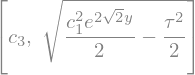

In [37]:
def sol_gamma_t_3(y):
    return c_3
def sol_gamma_u_3(y):
    return sqrt(c_1**2/2*exp(-sqrt(8)*y)-tau**2/2)
[sol_gamma_t_2(y) , sol_gamma_u_2(y)]

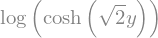

In [38]:
simplify(semi_dist_2.subs({t_1:c_3, u_1:sqrt(-tau**2/2+c_1**2/2), t_2: sol_gamma_t_3(y), u_2: sol_gamma_u_3(y)}))

# III. Control of the Fisher-Rao distance with the semi-distance, lower bound
Let $d\in \mathbb{N}^*$, $r=\frac{0.3025}{\sqrt{d}}$. 
Let $x, x_0\in \mathbb{R}^d \times [u_{min},+\infty)^d$ such that $d(x,x_0)\leq r$. We prove an inequality of the type $\mathfrak{d}_{\mathfrak{g}}(x,x_0)^2 \geq \frac{d(x,x_0)^2}{\tilde \varepsilon_3 }$.

**Content**

We showed that we can take $\tilde \varepsilon_3\geq 1+\frac{1}{R\left(\frac{0.3025}{\sqrt{d}}\right)}$ with 
$$ R(r)=\frac{-\left(1+\frac{r^2}{2}\right)+ \sqrt{\left(1+\frac{r^2}{2}\right)^2+2\frac{e^{2r^2}-1}{r^2}}}{\frac{e^{2r^2}-1}{r^2}} \,.$$ 
We found a lower bound for $R(r)$, $\frac{-\left(1+\frac{0.3025^2}{2}\right)+\sqrt{5}}{\frac{e^{2\times 0.3025^2}-1}{0.3025^2}}=:$ `bound`.
We calculate this bound and an upper bound on $1+\frac{1}{R(r)}$.

In [39]:
bound=(-(1+0.3025**2/2)+sqrt(5))/((exp(2*0.3025**2)-1)/(0.3025**2))
bound.evalf()

In [40]:
1+1/(bound.evalf())

# IV. Global controls on the kernel

We give $B_{ij}$ of <u>Assumption 1</u> ([Poon et al., 2021](https://link.springer.com/article/10.1007/s10208-021-09545-5)) for $(i,j) \in \lbrace 0, 1\rbrace \times \lbrace 0, 1, 2 \rbrace$. $B_{ij}$ is a constant such that $\underset{x,x' \in \mathbb{R}\times [u_{min},+\infty)}{\sup} \|K_{norm}^{(ij)}(x,x')\|_{x,x'} \leq B_{ij}$. We recall that 
$$
\|K_{norm}^{(00)}(x,x')\|_{x,x'}=|K_{norm}(x,x')|\,,
$$
   
$$
\|K_{norm}^{(10)}(x,x')\|_{x,x'}=\|\mathfrak{g}_x^{-1/2}\nabla_1 K_{norm}(x,x')\|_2\,,
$$

$$
\|K_{norm}^{(11)}(x,x')\|_{x,x'}=\|\mathfrak{g}_x^{-1/2}\nabla_1 \nabla_2 K_{norm}(x,x')\mathfrak{g}_{x'}^{-1/2}\|_2\,,
$$

$$
\|K_{norm}^{(02)}(x,x')\|_{x,x'}=\|\mathfrak{g}_{x'}^{-1/2}H_2^{\mathfrak{g}} K_{norm}(x,x')\mathfrak{g}_{x'}^{-1/2}\|_2
$$ 

and

$$
\|K_{norm}^{(12)}(x,x')\|_{x,x'}=\sup_{\substack{ \|V_1\|_{x'}, \|V_2\|_{x'} \leq 1 \\ \|(q_1,q_2)\|_{x} \leq 1}} q_1 V_1^T \partial_t H_2^{\mathfrak{g}} K_{norm}(x,x') V_2 + q_2 V_1^T \partial_u H_2^{\mathfrak{g}} K_{norm}(x,x') V_2 \,. 
$$

**Content**

* We calculate quantities relevant to the proof.

In [41]:
t_1 , t_2, tau=symbols("t t' tau", real=True)
u_1, u_2=symbols("u u'", positive=True)
K_norm=(2*u_1**2+tau**2)**Rational(1, 4)*(2*u_2**2+tau**2)**Rational(1, 4)*1/sqrt(u_1**2+u_2**2+tau**2)*exp(-(t_1-t_2)**2/(2*(u_1**2+u_2**2+tau**2)))

g_tt=diff(K_norm,t_1,t_2).subs({u_2:u_1,t_2:t_1})
g_uu=diff(K_norm,u_1,u_2).subs({u_2:u_1,t_2:t_1})
christoffel_symbols_t=Matrix([[0,-2*u_1/(tau**2+2*u_1**2)],[-2*u_1/(tau**2+2*u_1**2),0]])
christoffel_symbols_u=Matrix([[1/u_1,0],[0,(tau**2-2*u_1**2)/((tau**2+2*u_1**2)*u_1)]])

$\mathfrak{g}_{t't'}^{-2} \left(\partial_{t tt't'} K_{norm}(x',x') +\Gamma^{u'}{}_{t' t'}^2\partial_{uu'} K_{norm}(x',x')-2\Gamma^{u'}{}_{t' t'} \partial_{t tu'}K_{norm}(x',x')\right)$

In [42]:
Gamma_u_tt_2=christoffel_symbols_u[0,0].subs({t_1:t_2,u_1:u_2})
simplify((diff(K_norm,t_2,t_2,t_1,t_1).subs({u_1:u_2,t_1:t_2}) 
         + Gamma_u_tt_2**2*diff(K_norm,u_1,u_2).subs({u_1:u_2,t_1:t_2})
        -2*Gamma_u_tt_2*diff(K_norm,t_1,t_1,u_2).subs({u_1:u_2,t_1:t_2}))/(g_tt.subs({u_1:u_2,t_1:t_2})**2))

$$
\mathfrak{g}_{t't'}^{-1} \mathfrak{g}_{u'u'}^{-1} \left( 
\partial_{tut'u'} K_{norm}(x', x') 
+ \Gamma^{t'}{}_{t'u'}^2 \partial_{t t'} K_{norm}(x', x') 
- 2 \Gamma^{t'}{}_{t'u'} \partial_{t u t'} K_{norm}(x', x') 
\right)
$$

In [43]:
Gamma_t_tu_2=christoffel_symbols_t[0,1].subs({t_1:t_2,u_1:u_2})
simplify((diff(K_norm,t_2,u_2,t_1,u_1).subs({u_1:u_2,t_1:t_2}) 
         + Gamma_t_tu_2**2*diff(K_norm,t_1,t_2).subs({u_1:u_2,t_1:t_2})
        -2*Gamma_t_tu_2*diff(K_norm,t_1,u_1,t_2).subs({u_1:u_2,t_1:t_2}))/(g_tt.subs({u_1:u_2,t_1:t_2})*g_uu.subs({u_1:u_2,t_1:t_2})))

$$
\mathfrak{g}_{u'u'}^{-2} \left( 
\partial_{uuu'u'} K_{norm}(x', x') 
+ \Gamma^{u'}{}_{u'u'}^2 \partial_{u u'} K_{norm}(x', x') 
- 2 \Gamma^{u'}{}_{u'u'} \partial_{u u u'} K_{norm}(x', x') 
\right)
$$

In [44]:
Gamma_u_uu_2=christoffel_symbols_u[1,1].subs({t_1:t_2,u_1:u_2})
simplify((diff(K_norm,u_2,u_2,u_1,u_1).subs({u_1:u_2,t_1:t_2}) 
         + Gamma_u_uu_2**2*diff(K_norm,u_1,u_2).subs({u_1:u_2,t_1:t_2})
        -2*Gamma_u_uu_2*diff(K_norm,u_1,u_1,u_2).subs({u_1:u_2,t_1:t_2}))/(g_uu.subs({u_1:u_2,t_1:t_2})**2))

# V. Obtaining a lower bound $\bar \varepsilon_2$ on the Hessian
Denoting the Christoffel symbols $\Gamma^{i'}=\begin{pmatrix}
      \Gamma^{i'}{}_{t' t'} &  \Gamma^{i'}{}_{t' u'} 
      \\  \Gamma^{i'}{}_{t' u'}  &   \Gamma^{i'}{}_{u' u'} 
\end{pmatrix}$, the Riemannian Hessian of $K_{norm}$ wrt the second variable is $$H_2^{\mathfrak{g}} K_{norm}(x,x')=\nabla_{x'}^2 K_{norm}(x,x')-\Gamma^{t'} \frac{\partial}{\partial t'}K_{norm}(x,x')-\Gamma^{u'} \frac{\partial}{\partial u'}K_{norm}(x,x')\,.$$

$\bar \varepsilon_2(r)$ is a positive constant such that $$- (v_1, v_2) H_2^{\mathfrak{g}} K_{norm}(x,x') (v_1, v_2)^{T}\geq \bar\varepsilon_2(r) \|(v_1, v_2)\|_{x'}^2$$ for all $x, x' \in \mathbb{R}\times [u_{min},+ \infty)$ such that $d(x,x')\leq r$, for all $(v_1, v_2) \in \mathbb{R}^2$.

**Content**

* We calculate $H_2^{\mathfrak{g}} K_{norm}(x,x')$.
* We provide quantities used to get $\bar \varepsilon_2$.


## V.1. Calculation of the Riemannian Hessian $H_2^{\mathfrak{g}} K_{norm}(x,x')$

We calculate $\tilde{H}^{02}(x,x'):=\frac{1}{K_{norm}(x,x')} H_2^{\mathfrak{g}} K_{norm}(x,x')=\frac{1}{K_{norm}(x,x')}\mathfrak{g}_{x'}^{-1/2}H^{\mathfrak{g}}_2 K_{norm}(x,x') \mathfrak{g}_{x'}^{-1/2}$.

We show that 
$\tilde{H}^{02}(x,x')=\begin{pmatrix}
            \tilde H_{t't'}^{02}(x,x') & \tilde H_{t'u'}^{02}(x,x') \\
            \tilde H^{02}_{12}(x,x') & \tilde H_{u'u'}^{02}(x,x') 
        \end{pmatrix}$ where $\tilde H_{t't'}^{02}(x,x')=-1$,
        
$$\tilde H_{t'u'}^{02}(x,x')=\frac{(t-t')^3 (2u'^2+\tau^2)^{3/2}}{\sqrt{2}(u^2 + u'^2 + \tau^2)^3}- \frac{3(t-t')(2u'^2+\tau^2)^{1/2} (u'^2-u^2)}{\sqrt{2}(u^2 + u'^2 + \tau^2)^2}\,, $$

$$\tilde H_{u'u'}^{02}(x,x')=\frac{(t-t')^4 (2u'^2+\tau^2)^{2}}{2(u^2+u'^2+\tau^2)^4}+ 
\frac{3(t-t')^2 (2u'^2+\tau^2)(u^2-u'^2)}{(u^2+u'^2+\tau^2)^3}+\frac{(u^2-u'^2)^2}{2(u^2+u'^2+\tau^2)^2}-\frac{(2u^2+\tau^2)(2u'^2+\tau^2)}{(u^2+u'^2+\tau^2)^2}\,.$$  


<a id='calculation_riemannian_hessian'></a>

In [45]:
t_1 , t_2, tau=symbols("t t' tau", real=True)
u_1, u_2=symbols("u u'", positive=True)
K_norm=(2*u_1**2+tau**2)**Rational(1, 4)*(2*u_2**2+tau**2)**Rational(1, 4)*1/sqrt(u_1**2+u_2**2+tau**2)*exp(-(t_1-t_2)**2/(2*(u_1**2+u_2**2+tau**2)))

g_tt=diff(K_norm,t_1,t_2).subs({u_2:u_1,t_2:t_1})
g_uu=diff(K_norm,u_1,u_2).subs({u_2:u_1,t_2:t_1})
g_inv_sqrt=Matrix([[sqrt(1/g_tt),0],[0,sqrt(1/g_uu)]])
christoffel_symbols_t_2=Matrix([[0,-2*u_2/(tau**2+2*u_2**2)],[-2*u_2/(tau**2+2*u_2**2),0]])
christoffel_symbols_u_2=Matrix([[1/u_2,0],[0,(tau**2-2*u_2**2)/((tau**2+2*u_2**2)*u_2)]])

In the next cell, we check that the expression we simplified by hand is equal to the result given by Sympy.

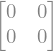

In [46]:
riemannian_hessian_K=simplify(hessian(K_norm, (t_2,u_2))-christoffel_symbols_t_2*diff(K_norm,t_2)-christoffel_symbols_u_2*diff(K_norm,u_2))
H_02_tilde=g_inv_sqrt.subs({t_1:t_2,u_1:u_2})*riemannian_hessian_K*g_inv_sqrt.subs({t_1:t_2,u_1:u_2})/K_norm

H_02_tilde_tt_by_hand=-1

H_02_tilde_tu_by_hand=(((t_1 - t_2)**3 * (2*u_2**2 + tau**2)**Rational(3,2)) / (sqrt(2)*(u_1**2 + u_2**2 + tau**2)**3) 
       - (3*(t_1 - t_2)*(2*u_2**2 + tau**2)**Rational(1,2)*(u_2**2 - u_1**2)) / (sqrt(2)*(u_1**2 + u_2**2 + tau**2)**2))


H_02_tilde_uu_by_hand=(((t_1 - t_2)**4 * (2*u_2**2 + tau**2)**2) / (2*(u_1**2 + u_2**2 + tau**2)**4) 
     + (3*(t_1 - t_2)**2 * (2*u_2**2 + tau**2)*(u_1**2 - u_2**2)) / ((u_1**2 + u_2**2 + tau**2)**3) 
     + ((u_1**2 - u_2**2)**2) / (2*(u_1**2 + u_2**2 + tau**2)**2) 
     - ((2*u_1**2 + tau**2)*(2*u_2**2 + tau**2)) / ((u_1**2 + u_2**2 + tau**2)**2))

simplify(Matrix([[H_02_tilde_tt_by_hand,H_02_tilde_tu_by_hand],[H_02_tilde_tu_by_hand,H_02_tilde_uu_by_hand]])-H_02_tilde)

## V.2. Bound for the maximal eigenvalue of $\tilde H^{02}(x,x')$
The function $G: r \mapsto \frac{1}{\sqrt{2}} r^3(e^{r^2}+\sqrt{e^{2r^2}-1})^{3/2}+\frac{3}{\sqrt{2}}r \sqrt{e^{2r^2}-1}\sqrt{e^{r^2}+\sqrt{e^{2r^2}-1}} +\frac{1}{2}r^4 (e^{r^2}+\sqrt{e^{2r^2}-1})^2 + 3r^2\sqrt{e^{2r^2}-1}(e^{r^2}+\sqrt{e^{2r^2}-1})+ \frac{1}{2}(e^{2r^2}-1)-e^{-2r^2}$ is non-decreasing. We show that $G$ is negative on $[0,0.32]$.

In [47]:
r=symbols('r', real=True)
G=(1/sqrt(2))*r**3*(exp(r**2)+sqrt(exp(2*r**2)-1))**Rational(3,2) + (3/sqrt(2))*r*sqrt(exp(2*r**2)-1)*sqrt(exp(r**2)+sqrt(exp(2*r**2)-1)) + Rational(1,2)*r**4*(exp(r**2)+sqrt(exp(2*r**2)-1))**2 + 3*r**2*sqrt(exp(2*r**2)-1)*(exp(r**2)+sqrt(exp(2*r**2)-1)) + Rational(1,2)*(exp(2*r**2)-1) - exp(-2*r**2)
G.evalf(subs={r:0.32})

## V.3. Dimension $d\geq 1$: calculation of $\tilde H_{b_k'b_l'}^{02}(x,x')$, $l\neq k$

We show that $$\mathfrak{g}_{x}^{-1/2}K_{norm}(x,x')^{-1}\nabla_1 K_{norm}(x,x')=\begin{pmatrix}
     - \frac{(t-t') \sqrt{2u^2+\tau^2}}{u^2+u'^2+\tau^2}
      \\  \frac{(t-t')^2 (2u^2+\tau^2)}{\sqrt{2}(u^2+u'^2+\tau^2)^2}+  \frac{u'^2-u^2}{\sqrt{2}(u^2+u'^2+\tau^2)}
\end{pmatrix} \,.$$

<a id='calculation_tilde_h_10'></a>

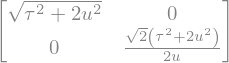

In [48]:
g_inv_sqrt=Matrix([[sqrt(1/g_tt),0],[0,sqrt(1/g_uu)]])
g_inv_sqrt

In [49]:
H_10_tilde_by_hand=Matrix([
    (-(t_1 - t_2)*sqrt(2*u_1**2 + tau**2))/(u_1**2 + u_2**2 + tau**2),
    ((t_1 - t_2)**2 * (2*u_1**2 + tau**2))/(sqrt(2)*(u_1**2 + u_2**2 + tau**2)**2) + (u_2**2 - u_1**2)/(sqrt(2)*(u_1**2 + u_2**2 + tau**2))
])
simplify(g_inv_sqrt/K_norm*Matrix([K_norm.diff(t_1),K_norm.diff(u_1)]) - H_10_tilde_by_hand)

# VI. Bounds for $K_{norm}$ when $d(x,x')$ is large

Let $\Delta>0$. Let $x,x' \in \mathbb{R} \times [u_{min},+\infty)$. Assume that $\tau \leq u_{min}$ and that $d(x,x')\geq \Delta$. We aim to provide an upper bound on $\max_{(i,j)\in \{0,1\} \times \{0,1,2\}} \|K_{norm}^{(ij)}(x,x')\|_{x,x'}$.   

**Content**

* We calculate $\tilde H^{ij}(x,x')= \sqrt{K_{norm}(x,x')}^{-1}H^{ij}(x,x')$ for $(i,j)\in \{0,1\} \times \{0,1,2\}$.
* We compare the bounds obtained.
* We provide quantities useful to deal with dimension $d\geq 1$.

## VI.1. Calculating $\tilde H^{ij}(x,x')$

In [50]:
t_1 , t_2, tau=symbols("t t' tau", real=True)
u_1, u_2=symbols("u u'", positive=True)
K_norm=(2*u_1**2+tau**2)**Rational(1, 4)*(2*u_2**2+tau**2)**Rational(1, 4)*1/sqrt(u_1**2+u_2**2+tau**2)*exp(-(t_1-t_2)**2/(2*(u_1**2+u_2**2+tau**2)))

g_tt=diff(K_norm,t_1,t_2).subs({u_2:u_1,t_2:t_1})
g_uu=diff(K_norm,u_1,u_2).subs({u_2:u_1,t_2:t_1})
g_inv_sqrt=Matrix([[sqrt(1/g_tt),0],[0,sqrt(1/g_uu)]])

christoffel_symbols_t=Matrix([[0,-2*u_1/(tau**2+2*u_1**2)],[-2*u_1/(tau**2+2*u_1**2),0]])
christoffel_symbols_u=Matrix([[1/u_1,0],[0,(tau**2-2*u_1**2)/((tau**2+2*u_1**2)*u_1)]])

**$\tilde{H}^{10}(x,x')$**: see [the above section](#calculation_tilde_h_10).

We showed that $$\mathfrak{g}_{x}^{-1/2}K_{norm}(x,x')^{-1}\nabla_1 K_{norm}(x,x')=\begin{pmatrix}
     - \frac{(t-t') \sqrt{2u^2+\tau^2}}{u^2+u'^2+\tau^2}
      \\  \frac{(t-t')^2 (2u^2+\tau^2)}{\sqrt{2}(u^2+u'^2+\tau^2)^2}+  \frac{u'^2-u^2}{\sqrt{2}(u^2+u'^2+\tau^2)}
\end{pmatrix} \,.$$

**$\tilde H^{11}(x,x')$**

We show that 
$K_{norm}(x,x')^{-1}\mathfrak{g}_x^{-1/2}\nabla_1\nabla_2 K_{norm}(x,x')\mathfrak{g}_{x'}^{-1/2}=\begin{pmatrix}
    \tilde H_{tt'}^{11}(x,x') &  \tilde H_{tu'}^{11}(x,x') \\
     \tilde H_{ut'}^{11}(x,x') &  \tilde H_{uu'}^{11}(x,x')
\end{pmatrix}$ where 
$$\tilde H_{tt'}^{11}(x,x')=\frac{\sqrt{2u^2+\tau^2}\sqrt{2u'^2+\tau^2}}{u^2+u'^2+\tau^2}- \frac{(t-t')^2 \sqrt{2u^2+\tau^2}\sqrt{2u'^2+\tau^2}}{(u^2+u'^2+\tau^2)^2}\,, $$
$$\tilde H_{ut'}^{11}(x,x')=\tilde H_{tu'}^{11}(x',x)=\frac{-(t-t')^3 u'(2u^2+\tau^2)\sqrt{2u'^2+\tau^2}}{\sqrt{2}u(u^2+u'^2+\tau^2)^3}+\frac{\sqrt{2}(t-t') u'(2u^2+\tau^2)\sqrt{2u'^2+\tau^2}}{u(u^2+u'^2+\tau^2)^2}+\frac{(t-t') u'(u'^2-u^2)(2u^2+\tau^2)}{\sqrt{2}u\sqrt{2u'^2+\tau^2}(u^2+u'^2+\tau^2)^2} \,,$$
$$\tilde H_{uu'}^{11}(x,x')=  \frac{(t-t')^4 (2u^2+\tau^2)(2u'^2+\tau^2)}{2(u^2+u'^2+\tau^2)^4}+\frac{-2(t-t')^2(2u^2+\tau^2)(2u'^2+\tau^2)}{(u^2+u'^2+\tau^2)^3}+\frac{(t-t')^2(u'^2-u^2)^2}{(u^2+u'^2+\tau^2)^3} + \frac{(2u^2+\tau^2)(2u'^2+\tau^2)}{(u^2+u'^2+\tau^2)^2} - \frac{(u^2-u'^2)^2}{2(u^2+u'^2+\tau^2)^2}\,.$$

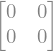

In [51]:
nabla_1_2_K=Matrix([[diff(K_norm,t_2,t_1),diff(K_norm,t_2,u_1)],[diff(K_norm,u_2,t_1),diff(K_norm,u_2,u_1)]])
H_11_tilde=simplify(g_inv_sqrt*nabla_1_2_K/K_norm*g_inv_sqrt.subs({t_1:t_2,u_1:u_2}))

H_11_tilde_tt_by_hand=(
    (sqrt(2*u_1**2+tau**2)*sqrt(2*u_2**2+tau**2))/(u_1**2+u_2**2+tau**2) -
    ((t_1-t_2)**2*sqrt(2*u_1**2+tau**2)*sqrt(2*u_2**2+tau**2))/(u_1**2+u_2**2+tau**2)**2
)

H_11_tilde_ut_by_hand=(
    (-(t_1 - t_2)**3 * u_2 * (2 * u_1**2 + tau**2) * sqrt(2 * u_2**2 + tau**2)) /
    (sqrt(2) * u_1 * (u_1**2 + u_2**2 + tau**2)**3) +
    
    (sqrt(2) * (t_1 - t_2) * u_2 * (2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)) /
    (u_1 * (u_1**2 + u_2**2 + tau**2)**2 * sqrt(2 * u_2**2 + tau**2)) +
    
    ((t_1 - t_2) * u_2 * (u_2**2 - u_1**2) * (2 * u_1**2 + tau**2)) /
    (sqrt(2) * u_1 * sqrt(2 * u_2**2 + tau**2) * (u_1**2 + u_2**2 + tau**2)**2)
)

t_3,u_3=symbols("t_3 u_3",real=True)
H_11_tilde_tu_by_hand=H_11_tilde_ut_by_hand.subs({t_1:t_3, u_1:u_3, t_2:t_1, u_2:u_1}).subs({t_3:t_2, u_3:u_2})

H_11_tilde_uu_by_hand=(
    ((t_1 - t_2)**4 * (2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)) /
    (2 * (u_1**2 + u_2**2 + tau**2)**4) +
    
    (-2 * (t_1 - t_2)**2 * (2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**3) +
    
    ((t_1 - t_2)**2 * (u_2**2 - u_1**2)**2) /
    ((u_1**2 + u_2**2 + tau**2)**3) +
    
    ((2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**2) -
    
    ((u_1**2 - u_2**2)**2) /
    (2 * (u_1**2 + u_2**2 + tau**2)**2)
)

simplify(Matrix([[H_11_tilde_tt_by_hand,H_11_tilde_tu_by_hand],[H_11_tilde_ut_by_hand,H_11_tilde_uu_by_hand]])-H_11_tilde)

**$\tilde{H}^{02}(x,x')$**: see [the above section](#calculation_riemannian_hessian).

We showed that 
$K_{norm}(x,x')^{-1}\mathfrak{g}_{x'}^{-1/2}H^{\mathfrak{g}}_2 K_{norm}(x,x') \mathfrak{g}_{x'}^{-1/2}=\begin{pmatrix}
            \tilde H_{t't'}^{02}(x,x') & \tilde H_{t'u'}^{02}(x,x') \\
            \tilde H^{02}_{12}(x,x') & \tilde H_{u'u'}^{02}(x,x') 
        \end{pmatrix}$ where $\tilde H_{t't'}^{02}(x,x')=-1$,
$$\tilde H_{t'u'}^{02}(x,x')=\frac{(t-t')^3 (2u'^2+\tau^2)^{3/2}}{\sqrt{2}(u^2 + u'^2 + \tau^2)^3}- \frac{3(t-t')(2u'^2+\tau^2)^{1/2} (u'^2-u^2)}{\sqrt{2}(u^2 + u'^2 + \tau^2)^2}\,, $$
   $$ \tilde H_{u'u'}^{02}(x,x')=\frac{(t-t')^4 (2u'^2+\tau^2)^{2}}{2(u^2+u'^2+\tau^2)^4}+ \frac{3(t-t')^2 (2u'^2+\tau^2)(u^2-u'^2)}{(u^2+u'^2+\tau^2)^3}+\frac{(u^2-u'^2)^2}{2(u^2+u'^2+\tau^2)^2}-\frac{(2u^2+\tau^2)(2u'^2+\tau^2)}{(u^2+u'^2+\tau^2)^2}\,. $$  

**$\tilde H^{12}(x,x')$**

We denote $H^{12,1}(x,x')=\mathfrak{g}_{tt}^{-1/2} \mathfrak{g}_{x'}^{-1/2} \partial_t H_2^{\mathfrak{g}} K_{norm}(x,x') \mathfrak{g}_{x'}^{-1/2}$ and 
$H^{12,2}(x,x')=\mathfrak{g}_{uu}^{-1/2} \mathfrak{g}_{x'}^{-1/2} \partial_u H_2^{\mathfrak{g}} K_{norm}(x,x') \mathfrak{g}_{x'}^{-1/2}\,.$ 

We find 
$\tilde H^{12,1}=K_{norm}(x,x')\begin{pmatrix}
\tilde H_{t't'}^{12,1}(x,x') &\tilde H_{t'u'}^{12,1}(x,x') \\
\tilde H_{t'u'}^{12,1}(x,x')&\tilde H_{u'u'}^{12,1}(x,x')
\end{pmatrix}$
with 
$$\tilde H_{t't'}^{12,1}(x,x')=\frac{(t-t')\sqrt{2u^2+\tau^2}}{u^2+u'^2+\tau^2}\,, $$
$$\tilde H_{t'u'}^{12,1}(x,x') =\frac{3 (t-t')^2 \sqrt{2u^2+\tau^2}(2u'^2+\tau^2)^{3/2}}{\sqrt{2}(u^2+u'^2+\tau^2)^3} -\frac{ (t-t')^4 \sqrt{2u^2+\tau^2}(2u'^2+\tau^2)^{3/2}}{\sqrt{2}(u^2+u'^2+\tau^2)^4}
     +\frac{3 (t-t')^2 \sqrt{2u^2+\tau^2}\sqrt{2u'^2+\tau^2}(u'^2-u^2)}{\sqrt{2}(u^2+u'^2+\tau^2)^3} + \frac{ 3\sqrt{2u^2+\tau^2}\sqrt{2u'^2+\tau^2}(u^2-u'^2)}{\sqrt{2}(u^2+u'^2+\tau^2)^2}\,,$$
$$\tilde H_{u'u'}^{12,1}(x,x')=\frac{-(t-t')^5(2u'^2+\tau^2)^2\sqrt{2u^2+\tau^2}}{2(u^2+u'^2+\tau^2)^5}+\frac{2(t-t')^3(2u'^2+\tau^2)^2\sqrt{2u^2+\tau^2}}{(u^2+u'^2+\tau^2)^4} +\frac{3(t-t')^3 (u'^2-u^2)(2u'^2+\tau^2)\sqrt{2u^2+\tau^2}}{(u^2+u'^2+\tau^2)^4} -\frac{(t-t')\sqrt{2u^2+\tau^2}(u^2-u'^2)^2}{2(u^2+u'^2+\tau^2)^3}+ \frac{(t-t')(2u'^2+\tau^2)(2u^2+\tau^2)^{3/2}}{(u^2+u'^2+\tau^2)^3}  +\frac{6(t-t')(2u'^2+\tau^2)(u^2-u'^2)\sqrt{2u^2+\tau^2}}{(u^2+u'^2+\tau^2)^3}\,.$$

We also have $\tilde H^{12,2}=K_{norm}(x,x')\begin{pmatrix}
\tilde H_{t't'}^{12,2}(x,x') &\tilde H_{t'u'}^{12,2}(x,x') \\
\tilde H_{t'u'}^{12,2}(x,x')&\tilde H_{u'u'}^{12,2}(x,x')
\end{pmatrix}$
with 
$$\tilde H_{t't'}^{12,2}(x,x')=\frac{-(t-t')^2(2u^2+\tau^2)}{\sqrt{2}(u^2+u'^2+\tau^2)^2}+\frac{u^2-u'^2}{\sqrt{2}(u^2+u'^2+\tau^2)}\,, $$
$$\tilde H_{t'u'}^{12,2}(x,x')=\frac{(t-t')^5(2u'^2+\tau^2)^{3/2}(2u^2+\tau^2)}{2(u^2+u'^2+\tau^2)^5} +\frac{(t-t')^3(2u'^2+\tau^2)^{1/2}(2u^2+\tau^2)(u^2-u'^2)}{(u^2+u'^2+\tau^2)^4} -\frac{4(t-t')^3(2u'^2+\tau^2)^{3/2}(2u^2+\tau^2)}{(u^2+u'^2+\tau^2)^4}+\frac{(t-t')^3(2u'^2+\tau^2)^{1/2}}{(u^2+u'^2+\tau^2)^2} \quad +\frac{3(t-t')(2u'^2+\tau^2)^{1/2}(2u^2+\tau^2)^2}{(u^2+u'^2+\tau^2)^3}+\frac{21(t-t')(2u'^2+\tau^2)^{1/2}(2u^2+\tau^2)(u'^2-u^2)}{2(u^2+u'^2+\tau^2)^3}  +\frac{3(t-t')(2u'^2+\tau^2)^{1/2}(u^2-u'^2)}{2(u^2+u'^2+\tau^2)^2}\,,$$
$$\tilde H_{u'u'}^{12,2}(x,x')=\frac{\sqrt{2}(t-t')^6(2u'^2+\tau^2)^{2}(2u^2+\tau^2)}{4(u^2+u'^2+\tau^2)^6} +\frac{5\sqrt{2}(t-t')^4(2u'^2+\tau^2)(2u^2+\tau^2)(u^2-u'^2)}{4(u^2+u'^2+\tau^2)^5} -\frac{2\sqrt{2}(t-t')^4(2u'^2+\tau^2)^2(2u^2+\tau^2)}{(u^2+u'^2+\tau^2)^5}+\frac{\sqrt{2}(t-t')^4(2u'^2+\tau^2)(u^2-u'^2)^2}{2(u^2+u'^2+\tau^2)^5}-\frac{5\sqrt{2}(t-t')^2(2u'^2+\tau^2)(u^2-u'^2)^2}{4(u^2+u'^2+\tau^2)^4}+\frac{5\sqrt{2}(t-t')^2(2u^2+\tau^2)(2u'^2+\tau^2)^2}{2(u^2+u'^2+\tau^2)^4}  +\frac{\sqrt{2}(t-t')^2(u^2-u'^2)^3}{2(u^2+u'^2+\tau^2)^4}-\frac{7\sqrt{2}(t-t')^2(2u^2+\tau^2)(2u'^2+\tau^2)(u^2-u'^2)}{(u^2+u'^2+\tau^2)^4} +\frac{7\sqrt{2}(2u'^2+\tau^2)(2u^2+\tau^2)(u^2-u'^2)}{2(u^2+u'^2+\tau^2)^3}-\frac{\sqrt{2}(u^2-u'^2)^3}{4(u^2+u'^2+\tau^2)^3} \,.$$

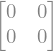

In [52]:
riemannian_hessian_K=simplify(hessian(K_norm, (t_2,u_2))-christoffel_symbols_t_2*diff(K_norm,t_2)-christoffel_symbols_u_2*diff(K_norm,u_2))
H_12_1_tilde=g_inv_sqrt[0,0]*g_inv_sqrt.subs({t_1:t_2,u_1:u_2})*riemannian_hessian_K.diff(t_1)*g_inv_sqrt.subs({t_1:t_2,u_1:u_2})/K_norm

H_12_1_tilde_tt_by_hand=(t_1-t_2)*sqrt(2*u_1**2+tau**2)/(u_1**2+u_2**2+tau**2)

H_12_1_tilde_tu_by_hand=(
    (3 * (t_1 - t_2)**2 * sqrt(2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)**Rational(3,2)) /
    (sqrt(2) * (u_1**2 + u_2**2 + tau**2)**3) -
    
    ((t_1 - t_2)**4 * sqrt(2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)**Rational(3,2)) /
    (sqrt(2) * (u_1**2 + u_2**2 + tau**2)**4) +
    
    (3 * (t_1 - t_2)**2 * sqrt(2 * u_1**2 + tau**2) * sqrt(2 * u_2**2 + tau**2) * (u_2**2 - u_1**2)) /
    (sqrt(2) * (u_1**2 + u_2**2 + tau**2)**3) +
    
    (3 * sqrt(2 * u_1**2 + tau**2) * sqrt(2 * u_2**2 + tau**2) * (u_1**2 - u_2**2)) /
    (sqrt(2) * (u_1**2 + u_2**2 + tau**2)**2)
)

H_12_1_tilde_uu_by_hand=(
    (-(t_1 - t_2)**5 * (2 * u_2**2 + tau**2)**2 * sqrt(2 * u_1**2 + tau**2)) /
    (2 * (u_1**2 + u_2**2 + tau**2)**5) +
    
    (2 * (t_1 - t_2)**3 * (2 * u_2**2 + tau**2)**2 * sqrt(2 * u_1**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**4) +
    
    (3 * (t_1 - t_2)**3 * (u_2**2 - u_1**2) * (2 * u_2**2 + tau**2) * sqrt(2 * u_1**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**4) -
    
    ((t_1 - t_2) * sqrt(2 * u_1**2 + tau**2) * (u_1**2 - u_2**2)**2) /
    (2 * (u_1**2 + u_2**2 + tau**2)**3) +
    
    ((t_1 - t_2) * (2 * u_2**2 + tau**2) * (2 * u_1**2 + tau**2)**Rational(3,2)) /
    ((u_1**2 + u_2**2 + tau**2)**3) +
    
    (6 * (t_1 - t_2) * (2 * u_2**2 + tau**2) * (u_1**2 - u_2**2) * sqrt(2 * u_1**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**3)
)

simplify(Matrix([[H_12_1_tilde_tt_by_hand,H_12_1_tilde_tu_by_hand],[H_12_1_tilde_tu_by_hand,H_12_1_tilde_uu_by_hand]])-H_12_1_tilde)

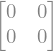

In [53]:
H_12_2_tilde=g_inv_sqrt[1,1]*g_inv_sqrt.subs({t_1:t_2,u_1:u_2})*riemannian_hessian_K.diff(u_1)*g_inv_sqrt.subs({t_1:t_2,u_1:u_2})/K_norm

H_12_2_tilde_tt_by_hand=-((t_1-t_2)**2*(2*u_1**2+tau**2))/(sqrt(2)*(u_1**2+u_2**2+tau**2)**2)+(u_1**2-u_2**2)/(sqrt(2)*(u_1**2+u_2**2+tau**2))

H_12_2_tilde_tu_by_hand=(
    ((t_1 - t_2)**5 * (2 * u_2**2 + tau**2)**Rational(3,2) * (2 * u_1**2 + tau**2)) /
    (2 * (u_1**2 + u_2**2 + tau**2)**5) +
    
    ((t_1 - t_2)**3 * (2 * u_2**2 + tau**2)**Rational(1,2) * (2 * u_1**2 + tau**2) * (u_1**2 - u_2**2)) /
    ((u_1**2 + u_2**2 + tau**2)**4) -
    
    (4 * (t_1 - t_2)**3 * (2 * u_2**2 + tau**2)**Rational(3,2) * (2 * u_1**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**4) +
    
    ((t_1 - t_2)**3 * (2 * u_2**2 + tau**2)**Rational(1,2)) /
    ((u_1**2 + u_2**2 + tau**2)**2) +
    
    (3 * (t_1 - t_2) * (2 * u_2**2 + tau**2)**Rational(1,2) * (2 * u_1**2 + tau**2)**2) /
    ((u_1**2 + u_2**2 + tau**2)**3) +
    
    (21 * (t_1 - t_2) * (2 * u_2**2 + tau**2)**Rational(1,2) * (2 * u_1**2 + tau**2) * (u_2**2 - u_1**2)) /
    (2 * (u_1**2 + u_2**2 + tau**2)**3) +
    
    (3 * (t_1 - t_2) * (2 * u_2**2 + tau**2)**Rational(1,2) * (u_1**2 - u_2**2)) /
    (2 * (u_1**2 + u_2**2 + tau**2)**2)
)

H_12_2_tilde_uu_by_hand=(
    (sqrt(2) * (t_1 - t_2)**6 * (2 * u_2**2 + tau**2)**2 * (2 * u_1**2 + tau**2)) /
    (4 * (u_1**2 + u_2**2 + tau**2)**6) +
    
    (5 * sqrt(2) * (t_1 - t_2)**4 * (2 * u_2**2 + tau**2) * (2 * u_1**2 + tau**2) * (u_1**2 - u_2**2)) /
    (4 * (u_1**2 + u_2**2 + tau**2)**5) -
    
    (2 * sqrt(2) * (t_1 - t_2)**4 * (2 * u_2**2 + tau**2)**2 * (2 * u_1**2 + tau**2)) /
    ((u_1**2 + u_2**2 + tau**2)**5) +
    
    (sqrt(2) * (t_1 - t_2)**4 * (2 * u_2**2 + tau**2) * (u_1**2 - u_2**2)**2) /
    (2 * (u_1**2 + u_2**2 + tau**2)**5) -
    
    (5 * sqrt(2) * (t_1 - t_2)**2 * (2 * u_2**2 + tau**2) * (u_1**2 - u_2**2)**2) /
    (4 * (u_1**2 + u_2**2 + tau**2)**4) +
    
    (5 * sqrt(2) * (t_1 - t_2)**2 * (2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2)**2) /
    (2 * (u_1**2 + u_2**2 + tau**2)**4) +
    
    (sqrt(2) * (t_1 - t_2)**2 * (u_1**2 - u_2**2)**3) /
    (2 * (u_1**2 + u_2**2 + tau**2)**4) -
    
    (7 * sqrt(2) * (t_1 - t_2)**2 * (2 * u_1**2 + tau**2) * (2 * u_2**2 + tau**2) * (u_1**2 - u_2**2)) /
    ((u_1**2 + u_2**2 + tau**2)**4) +
    
    (7 * sqrt(2) * (2 * u_2**2 + tau**2) * (2 * u_1**2 + tau**2) * (u_1**2 - u_2**2)) /
    (2 * (u_1**2 + u_2**2 + tau**2)**3) -
    
    (sqrt(2) * (u_1**2 - u_2**2)**3) /
    (4 * (u_1**2 + u_2**2 + tau**2)**3)
)

simplify(Matrix([[H_12_2_tilde_tt_by_hand,H_12_2_tilde_tu_by_hand],[H_12_2_tilde_tu_by_hand,H_12_2_tilde_uu_by_hand]])-H_12_2_tilde)

## VI.2. Bound for $\| K_{norm}^{(12)}(x,x')\|_{x,x'}$, comparison of the bounds found for $\| K_{norm}^{(ij)}(x,x')\|_{x,x'}$

We showed that 
$$
\| H^{12,1}(x,x')\|_2 \leq \sqrt{\frac{4}{e} + 2\left( \frac{18\sqrt{2}}{e}+\sqrt{2}\frac{64}{e^2}+ \frac{3}{\sqrt{2}}\right)^2+ \left(\sqrt{2}\left(\frac{10}{e} \right)^{5/2} + 7 \sqrt{2}\left(\frac{6}{e} \right)^{3/2} +\frac{15}{\sqrt{e}}\right)^2 }
$$ 

and that 

$$
\|H^{12,2}(x,x')\|_2\leq \sqrt{ \left( \frac{4\sqrt{2}}{e}+1\right)^2+ 2\left(\frac{1}{\sqrt{2}}\left(\frac{10}{e} \right)^{5/2}+ 6\sqrt{2}\left(\frac{6}{e} \right)^{3/2}+\frac{36}{\sqrt{e}} \right)^2 + \left(\frac{432 \sqrt{2}}{e^3} + \frac{272\sqrt{2}}{e^2} + \frac{60\sqrt{2}}{e}+ \frac{15\sqrt{2}}{4}\right)^2}\,.
$$ 

We write the first bound as `bound1` and the second one as `bound2`. Here we show that `bound2` is greater than `bound1`.

In [54]:
bound1=sqrt(4/exp(1)+2*(18*sqrt(2)/exp(1)+sqrt(2)*64/exp(2)+3/sqrt(2))**2+(sqrt(2)*(10/exp(1))**(5/2)+7*sqrt(2)*(6/exp(1))**(3/2)+15/sqrt(exp(1)))**2)
bound2=sqrt(
    (4*sqrt(2)/exp(1)+1)**2 +
    2*(1/sqrt(2)*(10/exp(1))**(5/2) + 6*sqrt(2)*(6/exp(1))**(3/2) + 36/sqrt(exp(1)))**2 +
    (432*sqrt(2)/exp(3) + 272*sqrt(2)/exp(2) + 60*sqrt(2)/exp(1) + 15*sqrt(2)/4)**2
)
[bound1.evalf(),bound2.evalf()]

We show that the bounds obtained for $\|K_{norm}^{(ij)}(x,x')\|_{x,x'}$, $(i,j)\in \{0,1\} \times \{0,1,2\}$ are smaller than the one obtained for $\|K_{norm}^{(12)}(x,x')\|_{x,x'}$ (namely $\sqrt{2}\times 153.05\times e^{-\frac{\Delta^2}{4}}=:$ `B_H_12` $\times e^{-\frac{\Delta^2}{4}}$).

We compare with $\sqrt{2}\times 153.05$:
* $\sqrt{\frac{4}{e} + \left(\frac{4\sqrt{2}}{e}+\frac{1}{\sqrt{2}} \right)^2}=:$ `B_H_10` (corresponding to $i=1,j=0$)
* $\sqrt{\left(1+\frac{4}{e} \right)^2+ 2\left(\frac{\sqrt{3}}{\sqrt{2}}\left(\frac{6}{e} \right)^{3/2} + \frac{3\sqrt{3}}{\sqrt{e}} \right)^2+\left( \frac{32}{e^2} +\frac{12}{e}+\frac{3}{2}\right)^2 }=:$ `B_H_11` (for $i=j=1$)
* $\sqrt{1+2 \left( 3\frac{\sqrt{2}}{\sqrt{e}} +2 \left(\frac{6}{e} \right)^{3/2}\right)^2 +  \left( \frac{128}{e^2}+\frac{24}{e} +\frac{3}{2} \right)^2}=:$ `B_H_02`  (for $i=0,j=2$).

In [55]:
B_H_12=sqrt(2)*153.05
B_H_10=sqrt(4/exp(1)+(4*sqrt(2)/exp(1)+1/sqrt(2))**2)
B_H_11=sqrt(
    (1+4/exp(1))**2 +
    2*(sqrt(3)/sqrt(2)*(6/exp(1))**(3/2) + 3*sqrt(3)/sqrt(exp(1)))**2 +
    (32/exp(2) + 12/exp(1) + 3/2)**2
)
B_H_02=sqrt(
    1 +
    2*(3*sqrt(2)/sqrt(exp(1)) + 2*(6/exp(1))**(3/2))**2 +
    (128/exp(2) + 24/exp(1) + 3/2)**2
)

display(Math("B_{H_{12}} = " + str(B_H_12.evalf()) + ", B_{H_{10}} = " + str(B_H_10.evalf()) + ", B_{H_{11}} = " + str(B_H_11.evalf()) + ", B_{H_{02}} = " + str(B_H_02.evalf())))

<IPython.core.display.Math object>

## VI.3. Dimension $d\geq 1$

In the following, we compare the bounds found for $\| K_{norm}^{(ij)}(x,x')\|_{x,x'}$ in dimension $d\geq 1$.

We denote by $B_{H_{b_k b_k}^{(ij)}}$ or $B_{H_{b_k' b_k'}^{(ij)}}$, etc., $i,j\in \{0,1\}\times\{0,1,2\}$ the bound we obtained for the coefficient of $|H^{ij}(x_k,x_k')|$ (in dimension $1$) corresponding to the derivatives in $b_k,b_k$ or $b_k',b_k'$, etc.
These bounds do not depend on a separation between $x$ and $x'$ (i.e. do not depend on $\Delta$). They allow us to express the bounds of $\| K_{norm}^{(ij)}(x,x')\|_{x,x'}$ in dimension $d\geq 1$.

**Remark**

* We calculate the quantities relevant to the proof.
We detail the global strategy used below to go from a bound of the form 
$$a\sqrt{d^2b+cd}$$ 
where $a,b,c>0$ to a simpler bound of the form 
$$\alpha d + \beta.$$ 
Remark that with $a_1,b_1,c_1$ upper bounds on $a,b,c$, we have 
$$\sqrt{d^2b+cd}\leq \sqrt{\left(\sqrt{b_1}d+\frac{c_1}{2\sqrt{b_1}}\right)^2}= \sqrt{b_1}d+\frac{c_1}{2\sqrt{b_1}}.$$ 
So 
$$a\sqrt{d^2b+cd} \leq \alpha d + \beta$$ 
where $\alpha\geq a_1\sqrt{b_1}$ and $\beta\geq a_1\frac{c_1}{2\sqrt{b_1}}$.

In [56]:
d,Delta=symbols("d Delta", real=True)

B_H_10_t=(2/sqrt(exp(1))).evalf()
B_H_10_u=(4*sqrt(2)/exp(1)+1/sqrt(2)).evalf()

B_H_11_tt=(1+4/exp(1)).evalf()
B_H_11_tu=(sqrt(3)/sqrt(2)*(6/exp(1))**(3/2) + 3*sqrt(3)/sqrt(exp(1))).evalf()
B_H_11_ut=(sqrt(3)/sqrt(2)*(6/exp(1))**(3/2) + 3*sqrt(3)/sqrt(exp(1))).evalf()
B_H_11_uu=(32/exp(2) + 12/exp(1) + 3/2).evalf()

B_H_02_tt=1
B_H_02_tu=(3*sqrt(2)/sqrt(exp(1)) + 2*(6/exp(1))**(3/2)).evalf()
B_H_02_ut=(3*sqrt(2)/sqrt(exp(1)) + 2*(6/exp(1))**(3/2)).evalf()
B_H_02_uu=(128/exp(2) + 24/exp(1) + 3/2).evalf()

B_H_12_1_tt=(2/sqrt(exp(1))).evalf()
B_H_12_1_tu=(18*sqrt(2)/exp(1)+sqrt(2)*64/exp(2)+3/sqrt(2)).evalf()
B_H_12_1_ut=(18*sqrt(2)/exp(1)+sqrt(2)*64/exp(2)+3/sqrt(2)).evalf()
B_H_12_1_uu=(sqrt(2)*(10/exp(1))**(5/2)+7*sqrt(2)*(6/exp(1))**(3/2)+15/sqrt(exp(1))).evalf()

B_H_12_2_tt=(4*sqrt(2)/exp(1)+1).evalf()
B_H_12_2_tu=(1/sqrt(2)*(10/exp(1))**(5/2) + 6*sqrt(2)*(6/exp(1))**(3/2) + 36/sqrt(exp(1))).evalf()
B_H_12_2_ut=(1/sqrt(2)*(10/exp(1))**(5/2) + 6*sqrt(2)*(6/exp(1))**(3/2) + 36/sqrt(exp(1))).evalf()
B_H_12_2_uu=(432*sqrt(2)/exp(3) + 272*sqrt(2)/exp(2) + 60*sqrt(2)/exp(1) + 15*sqrt(2)/4).evalf()

**$\|K_{norm}^{(10)}(x,x')\|_{x}$**

We have 
$$\|K_{norm}^{(10)}(x,x')\|_{x}\leq \sqrt{d} \sqrt{B_{H_{t_k}^{10}}^2+B_{H_{u_k}^{10}}^2}   e^{-\Delta^2/4} \leq 3.05\sqrt{d}  e^{-\Delta^2/4}\,.$$

In [57]:
sqrt(d)*sqrt(B_H_10_t**2+B_H_10_u**2)*exp(-Delta**2/4)

**$\|K_{norm}^{(11)}(x,x')\|_{x,x'}$**

We have $$\|K_{norm}^{(11)}(x,x')\|_{x,x'}\leq e^{-\Delta^2/4} \sqrt{ d(d-1)B_{H_{t_k}^{10}}^4+ d(d-1)B_{H_{u_k}^{10}}^4 + 2d(d-1)B_{H_{t_k}^{10}}^2B_{H_{u_k}^{10}}^2 +2dB_{H_{t_k,u_k'}^{11}}^2+ dB_{H_{t_k,t_k'}^{11}}^2+ dB_{H_{u_k,u_k'}^{11}}^2 }\,.$$
We show that this bound is smaller than $(9.25d+6.95)e^{-\Delta^2/4}$.

In [58]:
bound_sympy=exp(-Delta**2/4)*sqrt(d*(d-1)*B_H_10_t**4+d*(d-1)*B_H_10_u**4+2*d*(d-1)*B_H_10_t**2*B_H_10_u**2  +2*d*B_H_11_tu**2+d*B_H_11_tt**2+d*B_H_11_uu**2)
simplify(bound_sympy)

This bound is smaller than $(9.25d+6.95)e^{-\Delta^2/4}$ (see the calculation below and the **remark** above).

In [59]:
[sqrt(0.399728)*14.6231, 14.6231*0.600273/(2*sqrt(0.399728))]

**$\|K_{norm}^{(02)}(x,x')\|_{x'}$**

We have
$$\|K_{norm}^{(02)}(x,x')\|_{x'}\leq e^{-\Delta^2/4} \sqrt{d(d-1) B_{H_{t_k}^{10}}^4+d(d-1) B_{H_{u_k}^{10}}^4+2d(d-1) B_{H_{t_k}^{10}}^2B_{H_{u_k}^{10}}^2  + 2dB_{H_{t_k'u_k'}^{02}}^2+dB_{H_{t_k't_k'}^{02}}^2+dB_{H_{u_k'u_k'}^{02}}^2}\,.$$

In [60]:
bound_sympy=exp(-Delta**2/4)*sqrt(d*(d-1)*B_H_10_t**4+d*(d-1)*B_H_10_u**4+2*d*(d-1)*B_H_10_t**2*B_H_10_u**2  +2*d*B_H_02_tu**2+d*B_H_02_tt**2+d*B_H_02_uu**2)
simplify(bound_sympy)

This bound is smaller than $(9.25d+45.9)e^{-\Delta^2/4}$ (see the calculation below).

In [61]:
[sqrt(0.091671)*30.5356, 30.5356*0.90833/(2*sqrt(0.091671))]

**$\|K_{norm}^{(12)}(x,x')\|_{x,x'}$**

We have $\|K_{norm}^{(12)}(x,x')\|_{x,x'}\leq \sqrt{2d}\max_{b_k}\|M_{b_k}\|_2$.

We showed that
  $$ \|M_{t_k}\|_2 \leq e^{-\Delta^2/4} 
   \left( 
   \begin{aligned}
      & \max\left\{\sqrt{B_{H_{t_k}^{10}}^2B_{H_{t_k't_k'}^{02}}^2 +2B_{H_{t_k}^{10}}^2B_{H_{t_k'u_k'}^{02}}^2 + B_{H_{t_k}^{10}}^2B_{H_{u_k'u_k'}^{02}}^2} \,,\, \sqrt{2B_{H_{t_k',u_k'}^{12,1}}^2+ B_{H_{t_k',t_k'}^{12,1}}^2+ B_{H_{u_k',u_k'}^{12,1}}^2}\right\}  
       \\& \: \: + \sqrt{
          \begin{aligned}
   &(d^2-3d+2)B_{H_{t_k}^{10}}^2\left(B_{H_{t_k}^{10}}^4+2B_{H_{t_k}^{10}}^2B_{H_{u_k}^{10}}^2+ B_{H_{u_k}^{10}}^4 \right) \\
   & \: \: +2(d-1)\left( B_{H_{t_kt_k'}^{11}}^2B_{H_{t_k}^{10}}^2 + B_{H_{t_kt_k'}^{11}}^2B_{H_{u_k}^{10}}^2 + B_{H_{t_ku_k'}^{11}}^2B_{H_{t_k}^{10}}^2+ B_{H_{t_ku_k'}^{11}}^2B_{H_{u_k}^{10}}^2\right) 
   \end{aligned}
       }   \end{aligned}\right)
$$
and
$$ \|M_{u_k}\|_2 \leq e^{-\Delta^2/4} 
   \left( 
   \begin{aligned}
      & \max\left\{\sqrt{B_{H_{u_k}^{10}}^2B_{H_{t_k't_k'}^{02}}^2 +2B_{H_{u_k}^{10}}^2B_{H_{t_k'u_k'}^{02}}^2 + B_{H_{u_k}^{10}}^2B_{H_{u_k'u_k'}^{02}}^2} \,,\, \sqrt{2B_{H_{t_k',u_k'}^{12,2}}^2+ B_{H_{t_k',t_k'}^{12,2}}^2+ B_{H_{u_k',u_k'}^{12,2}}^2}\right\}  
       \\& \: \: + \sqrt{
          \begin{aligned}
   &(d^2-3d+2)B_{H_{u_k}^{10}}^2\left(B_{H_{t_k}^{10}}^4+2B_{H_{t_k}^{10}}^2B_{H_{u_k}^{10}}^2+ B_{H_{u_k}^{10}}^4 \right) \\
   & \: \: +2(d-1)\left( B_{H_{u_kt_k'}^{11}}^2B_{H_{t_k}^{10}}^2 + B_{H_{u_kt_k'}^{11}}^2B_{H_{u_k}^{10}}^2 + B_{H_{u_ku_k'}^{11}}^2B_{H_{t_k}^{10}}^2+ B_{H_{u_ku_k'}^{11}}^2B_{H_{u_k}^{10}}^2\right) 
   \end{aligned}
       }
   \end{aligned}\right)\,.$$

We first determine the bound on $ \|M_{t_k}\|_2$.

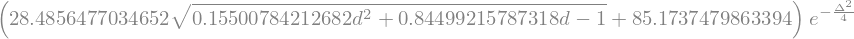

In [62]:
max_diag_coeff=max(sqrt(B_H_10_t**2*B_H_02_tt**2 + 2*B_H_10_t**2*B_H_02_tu**2 +B_H_10_t**2*B_H_02_uu**2), 
                   sqrt(2*B_H_12_1_tu**2 + B_H_12_1_tt**2 + B_H_12_1_uu**2))
bound_sympy=exp(-Delta**2/4)*(max_diag_coeff
                              + sqrt(                                
                                  (d**2-3*d+2)*B_H_10_t**2*(B_H_10_t**4+2*B_H_10_t**2*B_H_10_u**2+B_H_10_u**4) 
                                  + 2*(d-1)*(B_H_11_tt**2*B_H_10_t**2+ B_H_11_tt**2*B_H_10_u**2 +B_H_11_tu**2*B_H_10_t**2+B_H_11_tu**2*B_H_10_u**2)
                              ))
bound_sympy

This bound is smaller than $(11.22d+115.8)e^{-\Delta^2/4}$ (see the calculation below).

In [63]:
[sqrt(0.155008)*28.4857,28.4857*0.8449922/(2* sqrt(0.155008))+85.1738]

We then calcutate the bound on $ \|M_{u_k}\|_2$, which is larger.

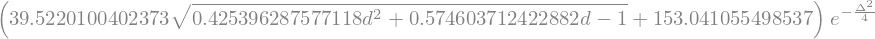

In [64]:
max_diag_coeff=max(sqrt(B_H_10_u**2*B_H_02_tt**2 + 2*B_H_10_u**2*B_H_02_tu**2 +B_H_10_u**2*B_H_02_uu**2), 
                   sqrt(2*B_H_12_2_tu**2 + B_H_12_2_tt**2 + B_H_12_2_uu**2))
bound_sympy=exp(-Delta**2/4)*(max_diag_coeff
                              + sqrt(                                
                                  (d**2-3*d+2)*B_H_10_u**2*(B_H_10_t**4+2*B_H_10_t**2*B_H_10_u**2+B_H_10_u**4) 
                                  + 2*(d-1)*(B_H_11_ut**2*B_H_10_t**2+ B_H_11_ut**2*B_H_10_u**2 +B_H_11_uu**2*B_H_10_t**2+B_H_11_uu**2*B_H_10_u**2)
                              ))
bound_sympy

This bound is smaller than $(25.78d+170.5)e^{-\Delta^2/4}$ (see the calculation below).

In [65]:
[sqrt(0.425397)*39.5221, 39.5221*0.574604/(2*sqrt(0.425397))+153.042]

# VII. Choice of $r,\Delta$ for the LPC, associated curvature constants

**Content**

* We provide graphical clues for the choice of $r$ in dimension $d=1$.
* We calculate useful quantities.

## VII.1. Dimension 1
For $0<r\leq 0.32$, we found $\bar \varepsilon_0(r)=1-e^{-r^2/2}$ and 
$\bar \varepsilon_2(r)= -e^{-r^2/2}G(r)$ where $$\begin{aligned}
 G(r)&= \frac{1}{\sqrt{2}} r^3(e^{r^2}+\sqrt{e^{2r^2}-1})^{3/2}+\frac{3}{\sqrt{2}}r \sqrt{e^{2r^2}-1}\sqrt{e^{r^2}+\sqrt{e^{2r^2}-1}} \\
 & \quad +\frac{1}{2}r^4 (e^{r^2}+\sqrt{e^{2r^2}-1})^2 + 3r^2\sqrt{e^{2r^2}-1}(e^{r^2}+\sqrt{e^{2r^2}-1})+ \frac{1}{2}(e^{2r^2}-1)-e^{-2r^2}  
\,. \end{aligned}$$

We also have  $B_0=1+ B_{00}+ B_{10}= 2+\sqrt{2}$ and $B_2=1+ B_{02}+ B_{12}= 1+\sqrt{14}(1+\sqrt{2})$.

We want to choose $r\leq 0.32$ such that $\min \left\{\frac{\bar \varepsilon_0(r)}{B_0} \, ,\, \frac{\bar \varepsilon_2(r)}{B_2}\right\}$ is maximal. Below we display $\frac{\bar \varepsilon_0(r)}{B_0}$ and $\frac{\bar \varepsilon_2(r)}{B_2}$, leading us to choose $r=0.3025$.

In [77]:
from jdesmos import Desmos
r=symbols("r", real=True)

B_0=2+sqrt(2)
B_2=1+sqrt(14)*(1+sqrt(2))

bar_eps_0=1-exp(-r**2/2)

G=((1/sqrt(2))*r**3*(exp(r**2)+sqrt(exp(2*r**2)-1))**Rational(3,2)  
   +(3/sqrt(2))*r*sqrt(exp(2*r**2)-1)*sqrt(exp(r**2)+sqrt(exp(2*r**2)-1))
   +Rational(1,2)*r**4*(exp(r**2)+sqrt(exp(2*r**2)-1))**2
   +3*r**2*sqrt(exp(2*r**2)-1)*(exp(r**2)+sqrt(exp(2*r**2)-1))
   +Rational(1,2)*(exp(2*r**2)-1)-exp(-2*r**2))
bar_eps_2=-G*exp(-r**2/2)

desmos = Desmos()
desmos.add_expression({"latex": "\\epsilon_0(r)="+latex(bar_eps_0)+"\\left\\{0<=r\\right\\}", "hidden": 'True'})
desmos.add_expression({"latex": "\\epsilon_2(r)="+latex(bar_eps_2)+"\\left\\{0<=r\\right\\}", "hidden": 'True'})
desmos.add_expression({"latex": "B_0="+latex(B_0)})
desmos.add_expression({"latex": "B_2="+latex(B_2)})
desmos.add_expression({"latex": "x=0.3025","lineStyle": 'DASHED', "color": '#22780f'})
desmos.add_expression({"latex": "x=0.32","lineStyle": 'DASHED', "color": '#c74440'})
desmos.add_expression({"latex": "\\frac{\\epsilon_0(x)}{B_0} \\left\\{x>=0\\right\\}", "color": '#388c46'})
desmos.add_expression({"latex": "\\frac{\\epsilon_2(x)}{B_2} \\left\\{x>=0\\right\\}", "color": '#00561b'})

desmos.display()

<IPython.core.display.Javascript object>

We provide possible choices for $\bar\varepsilon_0(0.3025)$, $\bar\varepsilon_2(0.3025)$ (these choices can be smaller than the quantities determined with the above expressions) along with $c_{0.3025}\leq \frac{1}{64}\min\left(\frac{\bar\varepsilon_0(0.3025)}{B_0},\frac{\bar\varepsilon_2(0.3025)}{B_2}\right)$ and $c_\Delta\geq \ln\left( \frac{\sqrt{2}153.05}{c_{0.3025}}\right)$.

In [68]:
[bar_eps_0.evalf(subs={r:0.3025}),bar_eps_2.evalf(subs={r:0.3025})]

In [69]:
Rational(1,64)*min(0.04472/B_0, 0.13139/B_2).evalf()

In [70]:
ln(sqrt(2)*153.05/0.000204618).evalf()

## VII.2. Dimension $d\geq 1$

Let $r=\frac{0.3025}{\sqrt{d}}$. We show that we can take $\bar\varepsilon_0(r)=\frac{0.0894}{2d} \leq 0.977 \frac{0.3025^2}{2d}$. 
Denoting $$\square_c: r\in \mathbb{R}^+ \mapsto 1-e^{-r^2/2}- c \frac{r^2}{2}\,,$$ we have $\square_{0.977}(0.3025)\geq 0$. Moreover, $0.0894\leq 0.977 \times 0.3025^2$.

In [71]:
1-exp(-0.3025**2/2)- 0.977*0.3025**2/2

In [72]:
0.3025**2*0.977

We show that $$\frac{\bar \varepsilon_0(0.3025)}{1+B_{00}+B_{10}} \leq \frac{\bar \varepsilon_2(0.3025)}{1+B_{02}+B_{12}} \iff \frac{0.13139}{0.0894}(4d+(2d)^{3/2})\geq 1+(1+\sqrt{2d})\sqrt{4d^2+10d}$$
as $\bar \varepsilon_0(0.3025)=\frac{0.0894}{2d}$, $\bar \varepsilon_2(0.3025)=0.13139$, $B_{00}=1$, $B_{10}=\sqrt{2d}$, $B_{02}=\sqrt{4d^2+10d}$, $B_{12}=\sqrt{2d}\sqrt{4d^2+10d}$.

First we show that this is true for $d=1$.

In [73]:
[0.13139/0.0894*(4+2*sqrt(2)).evalf(),1+(1+(sqrt(2)+1)*sqrt(14)).evalf()]

Then we show that this is true for $d\geq 2$. 

We use that $$4d^2+10d= 4(d^2+\frac{5}{2}d)\leq 4\left(d+\frac{5}{4}\right)^2\,,$$
along with (as $d\geq 2$) $$\frac{5}{\sqrt{2}}\sqrt{d}\leq \frac{5}{2}d$$ and $$1+\frac{5}{2}\leq \left(1+\frac{5}{2}\right)\frac{(2d)^{3/2}}{8}\,.$$
It comes that

$$
\begin{aligned}
1+(\sqrt{2d}+1)\sqrt{4d^2+10d}&\leq 1+2(\sqrt{2d}+1)\left(d+\frac{5}{4}\right)\,, \\
&= 1+\frac{5}{2}+ (2d)^{3/2}+2d+\frac{5}{\sqrt{2}}\sqrt{d}\,, \\
&\leq \left(\frac{1+\frac{5}{2}}{8}+1\right)(2d)^{3/2}+ \left(2+\frac{5}{2}\right)d\,.
\end{aligned}
$$

It suffices to show that $\left(\frac{1+\frac{5}{2}}{8}+1\right)\leq \frac{0.13139}{0.0894}$ and that $\left(2+\frac{5}{2}\right)\leq 4\frac{0.13139}{0.0894}$. We prove it below.

In [74]:
[0.13139/0.0894-((1+Rational(5/2))/8+1).evalf(), 4*0.13139/0.0894-(2+Rational(5/2)).evalf()]

We show that

$$\ln\left( \frac{64}{0.0894 }\right)+ \ln\left((170.5+ 25.78d)2d(2+\sqrt{2d})\sqrt{2d}\right)\leq 11.9+ 3\ln(6.62+d)\,.$$
In fact, as $\sqrt{2}+\sqrt{d}\leq \sqrt{1+2\sqrt{2}}\sqrt{d+\frac{2}{1+2\sqrt{2}}}$ and $\frac{2}{1+2\sqrt{2}}\leq \frac{170.5}{25.78}$,
$$
\begin{aligned}
\ln\left( \frac{64}{0.0894 }\right)+ \ln\left((170.5+ 25.78d)2d(2+\sqrt{2d})\sqrt{2d}\right)&\leq \ln\left( \frac{64}{0.0894 }\right)+ \ln(25.78\times 4)+ \ln\left(\left(\frac{170.5}{25.78}+ d\right)d^{3/2}(\sqrt{2}+\sqrt{d})\right)\,, \\
&\leq \ln\left( \frac{64}{0.0894 }\right)+ \ln(25.78\times 4)+ \ln\left(\sqrt{1+2\sqrt{2}}\right)+ \ln\left(\left(\frac{170.5}{25.78}+ d\right)d^{3/2}\sqrt{d+\frac{2}{1+2\sqrt{2}}}\right)\,,\\
&\leq \ln\left( \frac{64}{0.0894 }\right)+ \ln(25.78\times 4)+\ln\left(\sqrt{1+2\sqrt{2}}\right)+ 3\ln\left(\frac{170.5}{25.78}+ d\right)\,,\\
&\leq 11.9+3\ln(6.62+d) \,.
\end{aligned}
$$

In [75]:
[2/(1+2*sqrt(2)).evalf(),170.5/25.78]

In [76]:
(ln(64/0.0894)+ln(25.78*4)+ln(sqrt(1+2*sqrt(2)))).evalf()

## VII.3. Calculation of $\varepsilon_0, \varepsilon_2, \tilde \varepsilon_0, \tilde \varepsilon_2$  

Let $r=\frac{0.3025}{\sqrt{d}}$. We show that we can take $(\varepsilon_0,\varepsilon_2)=\left(\frac{0.03911}{d}, 0.06158\right)$, $(\tilde \varepsilon_0,\tilde \varepsilon_2)=\left(\frac{0.03911}{d},\frac{\sqrt{4d^2+10d}}{2}+0.004106\right)$. 

Recall that we set $\bar\varepsilon_2(r)=0.13139$, $\bar\varepsilon_0(r)=\frac{0.0894}{2d}$, $B_{02}=\sqrt{4d^2+10d}$. 
According to the definition of the non-degenerate certificates, and to our result linking the LPC with the existence of non-degenerate certificates, we can then choose $0<\varepsilon_0=\tilde \varepsilon_0 \leq \frac{7}{8}\bar\varepsilon_0(r)$, $0<\varepsilon_2 \leq \frac{15}{32}\bar\varepsilon_2(r)$, and $\tilde \varepsilon_2 \geq \frac{B_{02}}{2}+\frac{\bar\varepsilon_2(r)}{32}$.

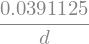

In [84]:
d=symbols("d", real=True)

7/8*0.0894/(2*d)

In [85]:
15/32*0.13139

In [86]:
0.13139/32